# Template 

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [1]:
!pip3 install -U random-forest-mc

In [1]:
%load_ext watermark

In [2]:
from random_forest_mc.model import RandomForestMC
from random_forest_mc.utils import load_file_json
from collections import Counter, defaultdict
import pandas as pd
import numpy as np
from itertools import combinations

In [3]:
from tqdm import tqdm

# from glob import glob

# import matplotlib.pyplot as plt
# %matplotlib inline
# from matplotlib import rcParams
# from cycler import cycler

# rcParams['figure.figsize'] = 12, 8 # 18, 5
# rcParams['axes.spines.top'] = False
# rcParams['axes.spines.right'] = False
# rcParams['axes.grid'] = True
# rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
# rcParams['lines.linewidth'] = 2.5

# import seaborn as sns
# sns.set_theme()

# pd.set_option("max_columns", None)
# pd.set_option("max_rows", None)
# pd.set_option('display.max_colwidth', None)

# from IPython.display import Markdown, display
# def md(arg):
#     display(Markdown(arg))

# from pandas_profiling import ProfileReport
# #report = ProfileReport(#DataFrame here#, minimal=True)
# #report.to

# import pyarrow.parquet as pq
# #df = pq.ParquetDataset(path_to_folder_with_parquets, filesystem=None).read_pandas().to_pandas()

# import json
# def open_file_json(path,mode='r',var=None):
#     if mode == 'w':
#         with open(path,'w') as f:
#             json.dump(var, f)
#     if mode == 'r':
#         with open(path,'r') as f:
#             return json.load(f)

# import functools
# import operator
# def flat(a):
#     return functools.reduce(operator.iconcat, a, [])

# import json
# from glob import glob
# from typing import NewType


# DictsPathType = NewType("DictsPath", str)


# def open_file_json(path):
#     with open(path, "r") as f:
#         return json.load(f)

# class LoadDicts:
#     def __init__(self, dict_path: DictsPathType = "./data"):
#         Dicts_glob = glob(f"{dict_path}/*.json")
#         self.List = []
#         self.Dict = {}
#         for path_json in Dicts_glob:
#             name = path_json.split("/")[-1].replace(".json", "")
#             self.List.append(name)
#             self.Dict[name] = open_file_json(path_json)
#             setattr(self, name, self.Dict[name])


In [4]:
# Run this cell before close.
%watermark -d --iversion -b -r -g -m -v
!cat /proc/cpuinfo |grep 'model name'|head -n 1 |sed -e 's/model\ name/CPU/'
!free -h |cut -d'i' -f1  |grep -v total

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.27.0

Compiler    : GCC 10.2.1 20210110
OS          : Linux
Release     : 5.11.0-7633-generic
Machine     : x86_64
Processor   : 
CPU cores   : 4
Architecture: 64bit

Git hash: 482a40170ab9399c8f77b7453c1a202b8ba9b674

Git repo: https://github.com/ysraell/random-forest-mc.git

Git branch: main

pandas: 1.3.2
numpy : 1.20.3

CPU	: Intel(R) Core(TM) i7-7500U CPU @ 2.70GHz
Mem:            15G
Swap:          4.0G


In [5]:
modeldict = load_file_json('/work/data/cls_rfmc_v030.json')
modeldict.keys()

dict_keys(['target_col', 'batch_train_pclass', 'batch_val_pclass', '_N', 'min_feature', 'max_feature', 'th_start', 'delta_th', 'max_discard_trees', 'n_trees', 'class_vals', 'Forest', 'survived_scores', 'version'])

In [6]:
cls = RandomForestMC()
for att in ['numeric_cols','feature_cols','type_of_cols','target_col','class_vals']:
    modeldict[att] = None
modeldict['version'] = '0.3.0'
cls.dict2model(modeldict)

In [7]:
len(cls.Forest)

128

In [8]:
cls.target_col = 'Class'

In [9]:
df = pd.read_csv('/work/data/creditcard_trans_int.csv')
target_col = 'Class'
ds_cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
df = df[ds_cols+[target_col]].dropna()
df_fraud = df.query('Class == 1').reset_index(drop=True).copy()
df_truth = df.query('Class == 0').reset_index(drop=True).copy()
df_train = pd.concat([df_fraud, df_truth.sample(n=500)]).reset_index(drop=True)
cls.process_dataset(df_train)

In [10]:
cls.featForestCount()

{'V1': 0.3203125,
 'V2': 0.3046875,
 'V3': 0.3984375,
 'V4': 0.75,
 'V5': 0.34375,
 'V6': 0.1953125,
 'V7': 0.2890625,
 'V8': 0.28125,
 'V9': 0.2265625,
 'V10': 0.3984375,
 'V11': 0.34375,
 'V12': 0.4296875,
 'V13': 0.1796875,
 'V14': 0.8046875,
 'V15': 0.2578125,
 'V16': 0.4375,
 'V17': 0.375,
 'V18': 0.28125,
 'V19': 0.2890625,
 'V20': 0.203125,
 'V21': 0.2578125,
 'V22': 0.203125,
 'V23': 0.2265625,
 'V24': 0.234375,
 'V25': 0.125,
 'V26': 0.1640625,
 'V27': 0.1484375,
 'V28': 0.2265625,
 'Amount': 0.328125}

In [11]:
cls.featScoreMean()

{'V1': 0.9206481790845308,
 'V2': 0.9193010186160874,
 'V3': 0.9219715283373626,
 'V4': 0.9220890410958905,
 'V5': 0.9220890410958907,
 'V6': 0.9205479452054794,
 'V7': 0.9207700851536469,
 'V8': 0.9237062404870624,
 'V9': 0.919933868682097,
 'V10': 0.9206956755304861,
 'V11': 0.9220890410958907,
 'V12': 0.9203611457036116,
 'V13': 0.9209350804050026,
 'V14': 0.9211663785077804,
 'V15': 0.9197799916977998,
 'V16': 0.922272504892368,
 'V17': 0.9202340182648401,
 'V18': 0.9207572298325724,
 'V19': 0.9217882265827473,
 'V20': 0.9234720758693361,
 'V21': 0.9232046492320464,
 'V22': 0.9237355110642783,
 'V23': 0.9188710439300894,
 'V24': 0.9187214611872143,
 'V25': 0.9214469178082192,
 'V26': 0.9192759295499021,
 'V27': 0.9197909156452774,
 'V28': 0.9222957014643363,
 'Amount': 0.9208251793868234}

In [12]:
cls.featPairCount()

100%|██████████| 128/128 [00:14<00:00,  8.62it/s]


{('V1', 'V2'): 13,
 ('V1', 'V3'): 18,
 ('V1', 'V4'): 32,
 ('V1', 'V5'): 10,
 ('V1', 'V6'): 8,
 ('V1', 'V7'): 12,
 ('V1', 'V8'): 9,
 ('V1', 'V9'): 8,
 ('V1', 'V10'): 13,
 ('V1', 'V11'): 17,
 ('V1', 'V12'): 15,
 ('V1', 'V13'): 7,
 ('V1', 'V14'): 31,
 ('V1', 'V15'): 4,
 ('V1', 'V16'): 18,
 ('V1', 'V17'): 12,
 ('V1', 'V18'): 9,
 ('V1', 'V19'): 11,
 ('V1', 'V20'): 12,
 ('V1', 'V21'): 8,
 ('V1', 'V22'): 7,
 ('V1', 'V23'): 8,
 ('V1', 'V24'): 10,
 ('V1', 'V25'): 2,
 ('V1', 'V26'): 6,
 ('V1', 'V27'): 5,
 ('V1', 'V28'): 10,
 ('V1', 'Amount'): 14,
 ('V2', 'V3'): 14,
 ('V2', 'V4'): 29,
 ('V2', 'V5'): 13,
 ('V2', 'V6'): 8,
 ('V2', 'V7'): 11,
 ('V2', 'V8'): 14,
 ('V2', 'V9'): 6,
 ('V2', 'V10'): 17,
 ('V2', 'V11'): 10,
 ('V2', 'V12'): 14,
 ('V2', 'V13'): 7,
 ('V2', 'V14'): 32,
 ('V2', 'V15'): 8,
 ('V2', 'V16'): 12,
 ('V2', 'V17'): 12,
 ('V2', 'V18'): 10,
 ('V2', 'V19'): 11,
 ('V2', 'V20'): 7,
 ('V2', 'V21'): 7,
 ('V2', 'V22'): 6,
 ('V2', 'V23'): 9,
 ('V2', 'V24'): 9,
 ('V2', 'V25'): 6,
 ('V2', 'V26')

In [14]:
print(cls.featCorrDataFrame())

100%|██████████| 128/128 [00:14<00:00,  8.89it/s]

               V1         V2         V3     V4        V5         V6  \
V1       0.320312  13.000000  18.000000  32.00  10.00000   8.000000   
V2      13.000000   0.304688  14.000000  29.00  13.00000   8.000000   
V3      18.000000  14.000000   0.398438  41.00  17.00000   5.000000   
V4      32.000000  29.000000  41.000000   0.75  35.00000  15.000000   
V5      10.000000  13.000000  17.000000  35.00   0.34375   9.000000   
V6       8.000000   8.000000   5.000000  15.00   9.00000   0.195312   
V7      12.000000  11.000000  13.000000  25.00  10.00000  10.000000   
V8       9.000000  14.000000  13.000000  27.00  12.00000   4.000000   
V9       8.000000   6.000000  13.000000  20.00   3.00000   3.000000   
V10     13.000000  17.000000  18.000000  35.00  15.00000   8.000000   
V11     17.000000  10.000000  14.000000  33.00  14.00000   4.000000   
V12     15.000000  14.000000  20.000000  40.00  15.00000  13.000000   
V13      7.000000   7.000000  11.000000  18.00   6.00000   3.000000   
V14   

# Draft

In [11]:
"\'V1\'" in str(cls.Forest[0])

True

In [12]:
feat_counts = {feat: sum([f"'{feat}'" in str(Tree) for Tree in cls.Forest])/len(cls.Forest) for feat in cls.feature_cols}
sorted(feat_counts.items(), key=lambda x: x[1], reverse=True)

[('V14', 0.8046875),
 ('V4', 0.75),
 ('V16', 0.4375),
 ('V12', 0.4296875),
 ('V3', 0.3984375),
 ('V10', 0.3984375),
 ('V17', 0.375),
 ('V5', 0.34375),
 ('V11', 0.34375),
 ('Amount', 0.328125),
 ('V1', 0.3203125),
 ('V2', 0.3046875),
 ('V7', 0.2890625),
 ('V19', 0.2890625),
 ('V8', 0.28125),
 ('V18', 0.28125),
 ('V15', 0.2578125),
 ('V21', 0.2578125),
 ('V24', 0.234375),
 ('V9', 0.2265625),
 ('V23', 0.2265625),
 ('V28', 0.2265625),
 ('V20', 0.203125),
 ('V22', 0.203125),
 ('V6', 0.1953125),
 ('V13', 0.1796875),
 ('V26', 0.1640625),
 ('V27', 0.1484375),
 ('V25', 0.125)]

In [129]:
sum_scores = sum(cls.survived_scores)
feat_counts = {feat: np.mean(list(filter(lambda num: num != 0,[(f"'{feat}'" in str(Tree))*score for Tree,score in zip(cls.Forest,cls.survived_scores)]))) for feat in cls.feature_cols}
sorted(feat_counts.items(), key=lambda x: x[1], reverse=True)

[('V22', 0.9237355110642783),
 ('V8', 0.9237062404870624),
 ('V20', 0.9234720758693361),
 ('V21', 0.9232046492320464),
 ('V28', 0.9222957014643363),
 ('V16', 0.922272504892368),
 ('V5', 0.9220890410958907),
 ('V11', 0.9220890410958907),
 ('V4', 0.9220890410958905),
 ('V3', 0.9219715283373626),
 ('V19', 0.9217882265827473),
 ('V25', 0.9214469178082192),
 ('V14', 0.9211663785077804),
 ('V13', 0.9209350804050026),
 ('Amount', 0.9208251793868234),
 ('V7', 0.9207700851536469),
 ('V18', 0.9207572298325724),
 ('V10', 0.9206956755304861),
 ('V1', 0.9206481790845308),
 ('V6', 0.9205479452054794),
 ('V12', 0.9203611457036116),
 ('V17', 0.9202340182648401),
 ('V9', 0.919933868682097),
 ('V27', 0.9197909156452774),
 ('V15', 0.9197799916977998),
 ('V2', 0.9193010186160874),
 ('V26', 0.9192759295499021),
 ('V23', 0.9188710439300894),
 ('V24', 0.9187214611872143)]

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(df[ds_cols], df[target_col])

RandomForestClassifier()

In [35]:
feat_counts_baseline = {feat: score for feat,score in zip(ds_cols, forest.feature_importances_)}

In [36]:
sorted(feat_counts_baseline.items(), key=lambda x: x[1], reverse=True)

[('V12', 0.145750137242988),
 ('V17', 0.13073994696652233),
 ('V14', 0.10869943505722834),
 ('V10', 0.10659552465814812),
 ('V11', 0.07494282109076995),
 ('V16', 0.07007434988401999),
 ('V9', 0.03723455894197347),
 ('V18', 0.031377649659517226),
 ('V7', 0.02974542566681773),
 ('V4', 0.02442541464406295),
 ('V26', 0.020258285882117703),
 ('V21', 0.01801605889498627),
 ('V1', 0.01675503823468746),
 ('V6', 0.016007484083145247),
 ('V3', 0.014916958829971082),
 ('V20', 0.01349498078472359),
 ('V27', 0.012218137804112314),
 ('V8', 0.011852712616607844),
 ('V19', 0.011730061830087143),
 ('V5', 0.011602808187383826),
 ('Amount', 0.01133494532179039),
 ('V2', 0.011281574126221659),
 ('V28', 0.011259359502862502),
 ('V13', 0.01094957985420983),
 ('V22', 0.010747722550576653),
 ('V25', 0.010685071237540667),
 ('V15', 0.010582035128143272),
 ('V24', 0.009877699910013103),
 ('V23', 0.006844221408771363)]

In [66]:
ForestFake = [str(cls.sampleFeats()) for _ in range(1024*10)]
feat_counts = {feat: sum([f"'{feat}'" in str(Tree) for Tree in ForestFake])/len(ForestFake) for feat in cls.feature_cols}
sorted(feat_counts.items(), key=lambda x: x[1], reverse=True)

[('V21', 0.75126953125),
 ('V27', 0.7501953125),
 ('V19', 0.74736328125),
 ('V25', 0.74482421875),
 ('V17', 0.74462890625),
 ('V3', 0.7443359375),
 ('V18', 0.744140625),
 ('V22', 0.74404296875),
 ('V26', 0.7439453125),
 ('V6', 0.74375),
 ('V8', 0.74365234375),
 ('V4', 0.743359375),
 ('V23', 0.74326171875),
 ('V24', 0.74296875),
 ('V16', 0.74287109375),
 ('V13', 0.7427734375),
 ('V7', 0.74267578125),
 ('V1', 0.7423828125),
 ('V20', 0.7419921875),
 ('V11', 0.74189453125),
 ('V9', 0.7412109375),
 ('Amount', 0.7404296875),
 ('V12', 0.74033203125),
 ('V15', 0.73994140625),
 ('V10', 0.73876953125),
 ('V14', 0.737890625),
 ('V2', 0.73740234375),
 ('V28', 0.73662109375),
 ('V5', 0.7361328125)]

In [14]:
cls.featScoreMean()

{'V1': 0.9206481790845308,
 'V2': 0.9193010186160874,
 'V3': 0.9219715283373626,
 'V4': 0.9220890410958905,
 'V5': 0.9220890410958907,
 'V6': 0.9205479452054794,
 'V7': 0.9207700851536469,
 'V8': 0.9237062404870624,
 'V9': 0.919933868682097,
 'V10': 0.9206956755304861,
 'V11': 0.9220890410958907,
 'V12': 0.9203611457036116,
 'V13': 0.9209350804050026,
 'V14': 0.9211663785077804,
 'V15': 0.9197799916977998,
 'V16': 0.922272504892368,
 'V17': 0.9202340182648401,
 'V18': 0.9207572298325724,
 'V19': 0.9217882265827473,
 'V20': 0.9234720758693361,
 'V21': 0.9232046492320464,
 'V22': 0.9237355110642783,
 'V23': 0.9188710439300894,
 'V24': 0.9187214611872143,
 'V25': 0.9214469178082192,
 'V26': 0.9192759295499021,
 'V27': 0.9197909156452774,
 'V28': 0.9222957014643363,
 'Amount': 0.9208251793868234}

In [16]:
Tree = cls.Forest[0]
[feat for feat in cls.feature_cols if f"'{feat}'" in str(Tree)]

['V1', 'V3', 'V4', 'V10', 'V14', 'V16', 'V17', 'V20', 'V23']

In [92]:
pair_count = defaultdict(int)
ntrees = len(cls.Forest)
for Tree in tqdm(cls.Forest):
    for pair in combinations(cls.feature_cols,2):
        pair_count[pair] += (f"'{pair[0]}'" in str(Tree) and f"'{pair[1]}'" in str(Tree))/ntrees

100%|██████████| 128/128 [00:14<00:00,  8.74it/s]


In [93]:
sorted(pair_count.items(), key=lambda x:x[1], reverse=True)

[(('V4', 'V14'), 0.5703125),
 (('V4', 'V16'), 0.359375),
 (('V3', 'V4'), 0.3203125),
 (('V10', 'V14'), 0.3203125),
 (('V14', 'V16'), 0.3203125),
 (('V4', 'V12'), 0.3125),
 (('V12', 'V14'), 0.3046875),
 (('V3', 'V14'), 0.2890625),
 (('V14', 'V17'), 0.28125),
 (('V4', 'V5'), 0.2734375),
 (('V4', 'V10'), 0.2734375),
 (('V5', 'V14'), 0.265625),
 (('V4', 'V11'), 0.2578125),
 (('V1', 'V4'), 0.25),
 (('V2', 'V14'), 0.25),
 (('V11', 'V14'), 0.25),
 (('V14', 'V15'), 0.25),
 (('V1', 'V14'), 0.2421875),
 (('V4', 'V17'), 0.2421875),
 (('V14', 'Amount'), 0.2421875),
 (('V2', 'V4'), 0.2265625),
 (('V4', 'V19'), 0.2265625),
 (('V7', 'V14'), 0.21875),
 (('V8', 'V14'), 0.21875),
 (('V14', 'V18'), 0.21875),
 (('V14', 'V21'), 0.21875),
 (('V4', 'V8'), 0.2109375),
 (('V14', 'V19'), 0.2109375),
 (('V4', 'V7'), 0.1953125),
 (('V4', 'V15'), 0.1953125),
 (('V4', 'V18'), 0.1953125),
 (('V14', 'V24'), 0.1953125),
 (('V4', 'V21'), 0.1875),
 (('V4', 'V24'), 0.1875),
 (('V4', 'Amount'), 0.1875),
 (('V12', 'V16'), 

In [96]:
N = len(cls.feature_cols)
matrix = np.zeros((N,N), dtype=np.float16)

for feat,count in feat_counts.items():
    idx = cls.feature_cols.index(feat)
    matrix[idx][idx] = count

for pair,count in pair_count.items():
    idxa = cls.feature_cols.index(pair[0])
    idxb = cls.feature_cols.index(pair[1])
    matrix[idxa][idxb], matrix[idxb][idxa] = count, count
    
corr = pd.DataFrame(matrix, index=cls.feature_cols, columns=cls.feature_cols)

<AxesSubplot:>

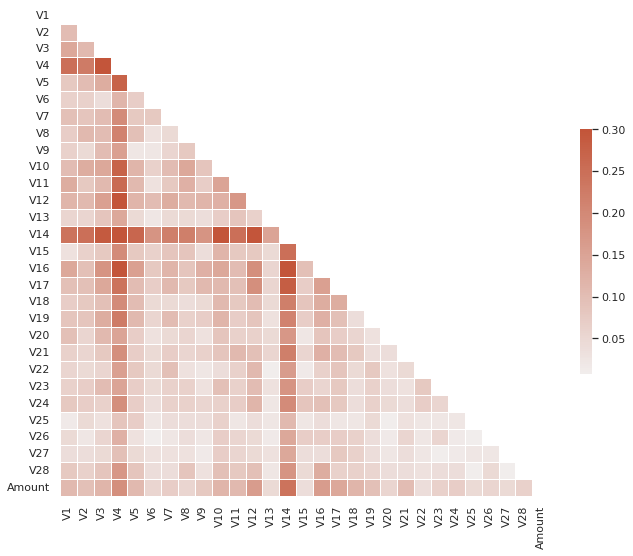

In [99]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})